<center><h1>CREDIT CARD FRAUD DETECTION SYSTEM</h1?</center>

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
df=pd.read_csv("fraud test.csv")

In [4]:
df['is_fraud'].unique()

array([0, 1], dtype=int64)

In [5]:
df.query('is_fraud==1')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,21/06/2020 22:06,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,21/06/2020 22:32,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,21/06/2020 22:37,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,21/06/2020 22:38,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,31/05/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,21/06/2020 23:02,3.560730e+15,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,22/12/2020 22:05,2.242180e+15,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,03/03/1959,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,517274,22/12/2020 22:18,2.242180e+15,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,03/03/1959,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,517341,22/12/2020 22:31,2.242180e+15,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,03/03/1959,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,517529,22/12/2020 23:06,2.242180e+15,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,03/03/1959,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1


In [6]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
df[['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']]=df[['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']].apply(LabelEncoder().fit_transform)

In [8]:
df.isna().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [9]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time      int32
cc_num                   float64
merchant                   int32
category                   int32
amt                      float64
first                      int32
last                       int32
gender                     int32
street                     int32
city                       int32
state                      int32
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int32
dob                        int32
trans_num                  int32
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [10]:
X=df.drop(['is_fraud'], axis=1)
y=df['is_fraud']

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [13]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [14]:
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100 : .2f}%')

Accuracy:  99.81%


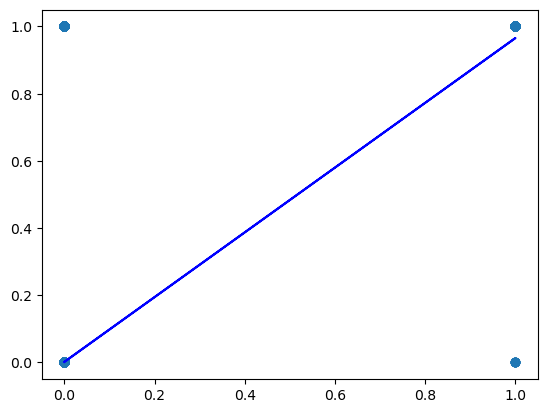

In [15]:
a,b=np.polyfit(y_pred, y_test, 1)

plt.scatter(y_pred, y_test)

plt.plot(y_pred, a*y_pred+b, 'b')

plt.show()

In [16]:
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [17]:
with open('model.pkl', 'rb') as file:
    loaded_model=pickle.load(file)

In [18]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,140408,2.291160e+15,319,10,2.86,151,115,1,341,...,33.9659,-80.9355,333497,275,544,98699,1371816865,33.986391,-81.200714,0
1,1,140408,3.573030e+15,591,10,29.84,163,457,0,354,...,40.3207,-110.4360,302,392,481,108785,1371816873,39.450498,-109.960431,0
2,2,140408,3.598220e+15,611,5,41.28,24,249,0,865,...,40.6729,-73.5365,34496,259,622,433979,1371816893,40.495810,-74.196111,0
3,3,140409,3.591920e+15,222,9,60.05,42,457,1,320,...,28.5697,-80.8191,54767,407,732,71993,1371816915,28.812398,-80.883061,0
4,4,140409,3.526830e+15,292,13,3.19,247,261,1,548,...,44.2529,-85.0170,1126,196,169,190585,1371816917,44.959148,-85.884734,0
5,5,140409,3.040770e+13,126,7,19.55,85,120,0,727,...,42.1939,-76.7361,520,361,378,263939,1371816937,41.747157,-77.584197,0
6,6,140409,2.131810e+14,526,5,133.93,189,409,0,9,...,40.5070,-123.9743,1139,455,419,49712,1371816944,41.499458,-124.888729,0
7,7,140409,3.589290e+15,500,10,10.37,256,119,0,340,...,43.7557,-97.5936,343,124,125,303363,1371816950,44.495498,-97.728453,0
8,8,140410,3.596360e+15,201,12,4.37,86,121,1,400,...,41.0001,-78.2357,3688,13,772,246521,1371816970,41.546067,-78.120238,0
9,9,140410,3.546900e+15,315,1,66.54,189,313,0,751,...,31.6591,-96.8094,263,41,865,363381,1371816971,31.782919,-96.366185,0


In [19]:
X.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,140408,2.291160e+15,319,10,2.86,151,115,1,341,...,29209,33.9659,-80.9355,333497,275,544,98699,1371816865,33.986391,-81.200714
1,1,140408,3.573030e+15,591,10,29.84,163,457,0,354,...,84002,40.3207,-110.4360,302,392,481,108785,1371816873,39.450498,-109.960431
2,2,140408,3.598220e+15,611,5,41.28,24,249,0,865,...,11710,40.6729,-73.5365,34496,259,622,433979,1371816893,40.495810,-74.196111
3,3,140409,3.591920e+15,222,9,60.05,42,457,1,320,...,32780,28.5697,-80.8191,54767,407,732,71993,1371816915,28.812398,-80.883061
4,4,140409,3.526830e+15,292,13,3.19,247,261,1,548,...,49632,44.2529,-85.0170,1126,196,169,190585,1371816917,44.959148,-85.884734
5,5,140409,3.040770e+13,126,7,19.55,85,120,0,727,...,14816,42.1939,-76.7361,520,361,378,263939,1371816937,41.747157,-77.584197
6,6,140409,2.131810e+14,526,5,133.93,189,409,0,9,...,95528,40.5070,-123.9743,1139,455,419,49712,1371816944,41.499458,-124.888729
7,7,140409,3.589290e+15,500,10,10.37,256,119,0,340,...,57374,43.7557,-97.5936,343,124,125,303363,1371816950,44.495498,-97.728453
8,8,140410,3.596360e+15,201,12,4.37,86,121,1,400,...,16858,41.0001,-78.2357,3688,13,772,246521,1371816970,41.546067,-78.120238
9,9,140410,3.546900e+15,315,1,66.54,189,313,0,751,...,76678,31.6591,-96.8094,263,41,865,363381,1371816971,31.782919,-96.366185


In [20]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: is_fraud, dtype: int64

In [21]:
X_test

array([[-0.98929145, -1.61265225, -0.31769703, ..., -1.00883872,
         0.52916797,  1.33987163],
       [-0.61399004,  0.68384978, -0.31796308, ..., -0.65560016,
        -0.66775837, -0.40937251],
       [ 1.63982005,  1.37587962, -0.3179631 , ...,  1.45642729,
         0.26327899, -0.21233826],
       ...,
       [ 0.12957891, -0.51752376,  3.10383439, ...,  0.16628494,
         0.83209045,  1.4085702 ],
       [ 0.1511357 , -0.40648878, -0.31798321, ...,  0.18510618,
        -0.21660525,  0.53591165],
       [ 0.47549773, -1.33789313, -0.31627963, ...,  0.56410789,
         1.16870703,  0.03304478]])

In [22]:
X['zip'].head()


0    29209
1    84002
2    11710
3    32780
4    49632
Name: zip, dtype: int64

In [23]:
test_data=pd.DataFrame([[140408, 2.291160e+15, 319, 10, 2.86, 151, 1211, 1232, 115, 1, 341	, 13, 33, 543, 333497, 275, 544, 98699, 1371816865, 33.986391, -81.200714	]],columns=['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'])
test_data.insert(0, "Unnamed: 0", [0])
load_pred=loaded_model.predict(test_data)
print('your predicted is_fraud value is : ' , load_pred)

your predicted is_fraud value is :  [0]


C:\Users\kanyu\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [46]:
df.query('is_fraud==1')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,140971,3.560730e+15,226,5,24.84,47,397,0,606,...,31.8599,-102.7413,23,109,448,49142,1371852399,32.575873,-102.604290,1
1767,1767,140996,6.564460e+15,523,8,780.52,101,459,1,587,...,42.5545,-90.3508,1306,367,279,371552,1371853942,42.461127,-91.147148,1
1781,1781,141001,6.564460e+15,451,0,620.33,101,459,1,587,...,42.5545,-90.3508,1306,367,279,155260,1371854247,42.771834,-90.158365,1
1784,1784,141002,4.005680e+15,238,11,1077.69,337,335,1,440,...,30.4590,-90.9027,71335,214,901,552695,1371854335,31.204974,-90.261595,1
1857,1857,141024,3.560730e+15,246,12,842.65,47,397,0,606,...,31.8599,-102.7413,23,109,448,534765,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,156408,2.242180e+15,670,12,1041.51,324,94,1,115,...,34.6323,-89.8855,14462,112,67,116075,1387749948,34.573471,-89.911011,1
517274,517274,156421,2.242180e+15,349,12,868.09,324,94,1,115,...,34.6323,-89.8855,14462,112,67,473847,1387750687,34.091227,-90.390612,1
517341,517341,156434,2.242180e+15,443,11,1039.42,324,94,1,115,...,34.6323,-89.8855,14462,112,67,81288,1387751508,34.628434,-90.284780,1
517529,517529,156469,2.242180e+15,29,4,289.27,324,94,1,115,...,34.6323,-89.8855,14462,112,67,99404,1387753563,34.746063,-90.401093,1


In [48]:
test_data=pd.DataFrame([[140971, 3.560730e+15, 226, 5, 24.84, 47, 397, 0, 606, 1, 341	, 13, 31.8599, -102.7413, 23, 109, 448, 49142, 1371852399, 32.575873, -102.604290]],columns=['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'])
test_data.insert(0, "Unnamed: 0", [0])
load_pred=loaded_model.predict(test_data)
print('your predicted is_fraud value is : ' , load_pred)

your predicted is_fraud value is :  [1]


C:\Users\kanyu\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
